In [1]:
import os.path as op

from datetime import datetime

import mne
from mne.datasets import sample

from mne_bids import write_raw_bids, read_raw_bids, make_bids_basename
from mne_bids.utils import print_dir_tree

In [2]:
data_path = sample.data_path()
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2, 'Visual/Left': 3,
            'Visual/Right': 4, 'Smiley': 5, 'Button': 32}

raw_fname = op.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif')
events_data = op.join(data_path, 'MEG', 'sample', 'sample_audvis_raw-eve.fif')
output_path = op.join(data_path, '..', 'MNE-sample-data-bids')

In [3]:
raw = mne.io.read_raw_fif(raw_fname)
bids_basename = make_bids_basename(subject='01', session='01',
                                   task='audiovisual', run='01')
write_raw_bids(raw, bids_basename, output_path, events_data=events_data,
               event_id=event_id, overwrite=True)

Opening raw data file C:\Users\chhol\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Opening raw data file C:\Users\chhol\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Creating folder: C:\Users\chhol\mne_data\MNE-sample-data\..\MNE-sample-data-bids\sub-01\ses-01\meg

Writing 'C:\Users\chhol\mne_data\MNE-sample-data\..\MNE-sample-data-bids\participants.tsv'...

participant_id	age	sex
sub-01	n/a	n/a

Writing 'C:\Users\chhol\mne_data\MNE-sample-data\..\MNE-sample-data-bids\participants.json'...

{
    "par

C:\Users\chhol\Anaconda3\lib\site-packages\mne_bids\write.py:407: UserWarning: No line frequency found, defaulting to 50 Hz
  warn('No line frequency found, defaulting to 50 Hz')



Writing 'C:\Users\chhol\mne_data\MNE-sample-data\..\MNE-sample-data-bids\sub-01\ses-01\meg\sub-01_ses-01_task-audiovisual_run-01_meg.json'...

{
    "TaskName": "audiovisual",
    "Manufacturer": "Elekta",
    "PowerLineFrequency": 50,
    "SamplingFrequency": 600.614990234375,
    "SoftwareFilters": "n/a",
    "RecordingDuration": 277.7136813300495,
    "RecordingType": "continuous",
    "DewarPosition": "n/a",
    "DigitizedLandmarks": false,
    "DigitizedHeadPoints": false,
    "MEGChannelCount": 306,
    "MEGREFChannelCount": 0,
    "EEGChannelCount": 60,
    "EOGChannelCount": 1,
    "ECGChannelCount": 0,
    "EMGChannelCount": 0,
    "MiscChannelCount": 0,
    "TriggerChannelCount": 9
}

Writing 'C:\Users\chhol\mne_data\MNE-sample-data\..\MNE-sample-data-bids\sub-01\ses-01\meg\sub-01_ses-01_task-audiovisual_run-01_channels.tsv'...

name	type	units	low_cutoff	high_cutoff	description	sampling_frequency	status
MEG 0113	MEGGRADPLANAR	T/m	0.10000000149011612	172.17630004882812	Plana

C:\Users\chhol\Anaconda3\lib\site-packages\mne\utils\docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\chhol\Anaconda3\lib\site-packages\mne\utils\docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


Closing C:\Users\chhol\mne_data\MNE-sample-data-bids\sub-01\ses-01\meg\sub-01_ses-01_task-audiovisual_run-01_meg.fif [done]


'C:\\Users\\chhol\\mne_data\\MNE-sample-data\\..\\MNE-sample-data-bids'

Specify some empty room data and run BIDS conversion on it.

In [4]:
er_raw_fname = op.join(data_path, 'MEG', 'sample', 'ernoise_raw.fif')
er_raw = mne.io.read_raw_fif(er_raw_fname)
# For empty room data we need to specify that the subject ID is
# 'emptyroom', and that the task is 'noise'.
# We also need to specify the recording date in the format YYYYMMDD for the
# session id.
er_date = datetime.fromtimestamp(
    er_raw.info['meas_date'][0]).strftime('%Y%m%d')
er_bids_basename = 'sub-emptyroom_ses-{0}_task-noise'.format(er_date)
write_raw_bids(er_raw, er_bids_basename, output_path, overwrite=True)

Opening raw data file C:\Users\chhol\mne_data\MNE-sample-data\MEG\sample\ernoise_raw.fif...
Isotrak not found
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 19800 ... 85867 =     32.966 ...   142.965 secs
Ready.
Current compensation grade : 0
Opening raw data file C:\Users\chhol\mne_data\MNE-sample-data\MEG\sample\ernoise_raw.fif...
Isotrak not found
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 19800 ... 85867 =     32.966 ...   142.965 secs
Ready.
Current compensation grade : 0
Creating folder: C:\Users\chhol\mne_data\MNE-sample-data\..\MNE-sample-data-bids\sub-emptyroom\ses-20021206\meg

Writing 'C:\Users\chhol\mne_data\MNE-sample-data\..\MNE-sample-data-bids\participants.tsv'...

participant_id	age	sex
sub-01	n/a	n/a
sub-emptyroom	n/a	n/a

Writing 'C:\Users\chhol\mne_data\MNE-sample-data\

'C:\\Users\\chhol\\mne_data\\MNE-sample-data\\..\\MNE-sample-data-bids'

Now let's see the structure of the BIDS folder we created.

In [6]:
print_dir_tree(output_path)

|MNE-sample-data-bids\
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-01\
|------ ses-01\
|--------- sub-01_ses-01_scans.tsv
|--------- meg\
|------------ sub-01_ses-01_coordsystem.json
|------------ sub-01_ses-01_task-audiovisual_run-01_channels.tsv
|------------ sub-01_ses-01_task-audiovisual_run-01_events.tsv
|------------ sub-01_ses-01_task-audiovisual_run-01_meg.fif
|------------ sub-01_ses-01_task-audiovisual_run-01_meg.json
|--- sub-emptyroom\
|------ ses-20021206\
|--------- sub-emptyroom_ses-20021206_scans.tsv
|--------- meg\
|------------ sub-emptyroom_ses-20021206_task-noise_channels.tsv
|------------ sub-emptyroom_ses-20021206_task-noise_meg.fif
|------------ sub-emptyroom_ses-20021206_task-noise_meg.json


Finally, we can read the BIDS data we created as well.

In [7]:
bids_fname = bids_basename + '_meg.fif'
raw = read_raw_bids(bids_fname, output_path)

Opening raw data file C:\Users\chhol\mne_data\MNE-sample-data\..\MNE-sample-data-bids\sub-01\ses-01\meg\sub-01_ses-01_task-audiovisual_run-01_meg.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading events from C:\Users\chhol\mne_data\MNE-sample-data\..\MNE-sample-data-bids\sub-01\ses-01\meg\sub-01_ses-01_task-audiovisual_run-01_events.tsv.
Reading channel info from C:\Users\chhol\mne_data\MNE-sample-data\..\MNE-sample-data-bids\sub-01\ses-01\meg\sub-01_ses-01_task-audiovisual_run-01_channels.tsv.


<ipython-input-7-62fe715b43a4>:2: RuntimeWarning: The unit for channel(s) STI 001, STI 002, STI 003, STI 004, STI 005, STI 006, STI 014, STI 015, STI 016 has changed from V to NA.
  raw = read_raw_bids(bids_fname, output_path)


The data is already in a convenient form to create epochs and evokeds.

Used Annotations descriptions: ['Auditory/Left', 'Auditory/Right', 'Button', 'Smiley', 'Visual/Left', 'Visual/Right']
320 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated


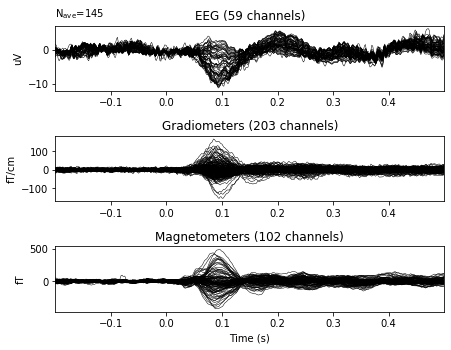

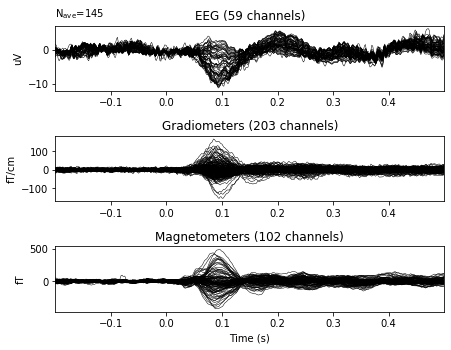

In [9]:
events, event_id = mne.events_from_annotations(raw)
epochs = mne.Epochs(raw, events, event_id)
epochs['Auditory'].average().plot()